In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

# **Load Data Set**

In [3]:
# Load the data
df = pd.read_csv('../Data/data_5KNN.csv')

# Transform it into numpy array
data = df.to_numpy()

In [4]:
# Get the variables
X = data[:,1:]
y = data[:,0]

# Shape
[n, p] = np.shape(X)

In [5]:
## Train and Test set just to see things!!!!!!!!!! Wont be like this in the end
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y, train_size=0.8, random_state=42)

# **OLS**

## **Training**

In [6]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

# Initialize scaler (standardization)
scaler = StandardScaler()

ols_model = LinearRegression()
ols_model.fit(X, y)

LinearRegression()

## $\boldsymbol{\hat{RMSE}}$

In [7]:
from sklearn.model_selection import cross_val_score
# Compute RMSE using cross-validation (5-fold)
# The function cross_val_score takes an average over cross-validation folds
cv_rmse_scores_ols = np.sqrt(-cross_val_score(ols_model, scaler.fit_transform(X), y, 
                                          scoring='neg_mean_squared_error', cv=5))

# Estimate of RMSE (average over folds)
estimated_RMSE_ols = np.mean(cv_rmse_scores_ols)

print(f"Estimated RMSE for each fold OLS: {cv_rmse_scores_ols}")
print(f"Estimated RMSE (average) OLS: {estimated_RMSE_ols:.4f}")

Estimated RMSE for each fold OLS: [42.02424092 56.59851122 48.56983507 33.86713045 46.19264911]
Estimated RMSE (average) OLS: 45.4505


# **Ridge Regression**

In [8]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

## **Training**

In [62]:
# Define a range of lambda (alpha) values to test
lambda_values = np.logspace(-3, 3, 100)

# Initialize scaler (standardization)
scaler = StandardScaler()

# Define a pipeline that includes normalization and regression to indtroduce in the GridSearchCV
ridge_pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Standardize features
    ('ridge', Ridge())             # Apply Ridge Regression
])

# We need a dictionary as an input for the parameters
param_lambda_values = {'ridge__alpha' : lambda_values}

# Perform GridSearchCV to find the best lambda (alpha in this case)
# Its basically a tool to tune/optimize a hyperparamter (lambda in this case)
# its neg_mse beacuse we want to MINIMIZE the score mse (gridsearch always maximizes the score)
ridge_cv = GridSearchCV(estimator=ridge_pipeline, param_grid=param_lambda_values, scoring='neg_mean_squared_error', cv=5) # we obtain min RMSE with 5 folds
ridge_cv.fit(X, y)  # it is using the normalized data stablished in the pipeline

# Get the best lambda
best_lambda_ridge = ridge_cv.best_params_['ridge__alpha']
print(f"Best lambda for Ridge: {best_lambda_ridge}")

# Fit Ridge with the BEST lambda
best_ridge = Ridge(alpha=best_lambda_ridge)
best_ridge.fit(scaler.fit_transform(X), y)  # Transform X_train before fitting

Best lambda for Ridge: 5.72236765935022


Ridge(alpha=5.72236765935022)

In [67]:
ridge_cv.best_index_
maxAcc
print(maxAcc-ridge_cv.best_index_)

0


In [ ]:
# Define a range of lambda (alpha) values to test
lambda_values = np.logspace(-3, 3, 100)

# Initialize scaler (standardization)
scaler = StandardScaler()

# Define a pipeline that includes normalization and regression to indtroduce in the GridSearchCV
ridge_pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Standardize features
    ('ridge', Ridge())             # Apply Ridge Regression
])

# We need a dictionary as an input for the parameters
param_lambda_values = {'ridge__alpha' : lambda_values}

# Perform GridSearchCV to find the best lambda (alpha in this case)
# Its basically a tool to tune/optimize a hyperparamter (lambda in this case)
# its neg_mse beacuse we want to MINIMIZE the score mse (gridsearch always maximizes the score)
ridge_cv = GridSearchCV(estimator=ridge_pipeline, param_grid=param_lambda_values, scoring='neg_mean_squared_error', cv=5) # we obtain min RMSE with 5 folds
ridge_cv.fit(X, y)  # it is using the normalized data stablished in the pipeline

# Get the best lambda
best_lambda_ridge = ridge_cv.best_params_['ridge__alpha']
# print(f"Best lambda for Ridge: {best_lambda_ridge}")

# Apply one standard error rule
cv_results = ridge_cv.cv_results_
mean_scores = -cv_results['mean_test_score']  # Convert back to MSE
std_scores = cv_results['std_test_score']

# # Way 1: Class
# maxAcc = np.argsort(mean_scores)[0]
# J = np.where(mean_scores[maxAcc] + std_scores[maxAcc] > mean_scores)[0]

# if len(J) > 0:
#     best_lambda_ose = lambda_values[int(J[-1])]
# else:
#     best_lambda_ose = best_lambda_ridge

# Way 2: sklearn
best_idx = ridge_cv.best_index_     # find the indx with the lowest mse
one_std_error = mean_scores[best_idx] + std_scores[best_idx]

# Find the simplest model (largest lambda) within one std error
candidate_indices = np.where(mean_scores <= one_std_error)[0]
best_lambda_ridge_ose = np.max(lambda_values[candidate_indices])

# Parameters
print(f"Best lambda (original): {ridge_cv.best_params_['ridge__alpha']:.4f}")
print(f"Best lambda (one std error): {best_lambda_ose:.4f}")

# Fit Ridge with the one std error lambda
best_ridge = Ridge(alpha=best_lambda_ridge_ose)
best_ridge.fit(scaler.fit_transform(X), y)

Best lambda (original): 5.7224
Best lambda (one std error): 35.1119


Ridge(alpha=35.111917342151344)

In [55]:
lambda_values[75]

35.111917342151344

## $\boldsymbol{\hat{RMSE}}$

For now, just trying with Kfold CV. Later on we'll try bootstrap etc 

In [69]:
from sklearn.model_selection import cross_val_score

# Compute RMSE using cross-validation (5-fold)
# The function cross_val_score takes an average over cross-validation folds
cv_rmse_scores_ridge = np.sqrt(-cross_val_score(best_ridge, scaler.transform(X), y, scoring='neg_mean_squared_error', cv=5))

# Estimate of RMSE (average over folds)
estimated_RMSE_ridge = np.mean(cv_rmse_scores_ridge)

print(f"Estimated RMSE for each fold Ridge Regression: {cv_rmse_scores_ridge}")
print(f"Estimated RMSE (average) Ridge Regression: {estimated_RMSE_ridge:.4f}")

Estimated RMSE for each fold Ridge Regression: [39.25835371 33.35674673 52.052368   42.09044651 29.45795713]
Estimated RMSE (average) Ridge Regression: 39.2432


## **Plots**

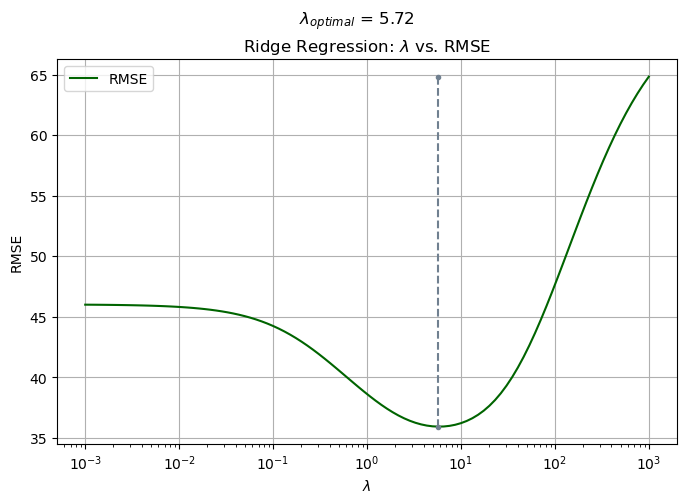

In [12]:
mse_scores = -ridge_cv.cv_results_['mean_test_score']
rmse_scores = np.sqrt(mse_scores)

plt.figure(figsize=(8, 5))
plt.plot(lambda_values, rmse_scores, color='darkgreen', linestyle='-', label='RMSE')
plt.semilogx([best_lambda_ridge, best_lambda_ridge], [np.min(rmse_scores), np.max(rmse_scores)], marker = ".", linestyle = '--', color='slategray')
plt.xscale('log')  # Log scale for better visualization
plt.xlabel(r"$\lambda$")
plt.ylabel("RMSE")
plt.suptitle(rf"$\lambda_{{optimal}}$ = {best_lambda_ridge:.2f}", fontsize=12)
plt.title(r"Ridge Regression: $\lambda$ vs. RMSE")
plt.legend()
plt.grid()
plt.show()

# **Lasso Regression**

In [70]:
from sklearn.linear_model import Lasso

## **Training: Cyclical Coordinate Descent**

In [75]:
# Define a range of lambda (alpha) values to test
lambda_values = np.logspace(-3, 3, 100)

# Initialize scaler (standardization)
scaler = StandardScaler()

# Define a pipeline that includes normalization and regression to indtroduce in the GridSearchCV
lasso_pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Standardize features
    ('lasso', Lasso(max_iter=50000))             # Apply Lasso Regression
])

# We need a dictionary as an input for the parameters
param_lambda_values = {'lasso__alpha' : lambda_values}

# Perform GridSearchCV to find the best lambda (alpha in this case)
# Its basically a tool to tune/optimize a hyperparamter (lambda in this case)
# its neg_mse beacuse we want to MINIMIZE the score mse (gridsearch always maximizes the score)
lasso_cv = GridSearchCV(estimator=lasso_pipeline, param_grid=param_lambda_values, scoring='neg_mean_squared_error', cv=5) # we obtain min RMSE with 5 folds
lasso_cv.fit(X, y)  # it is using the normalized data stablished in the pipeline

# Apply one standard error rule (OSE)
cv_results = lasso_cv.cv_results_
mean_scores = -cv_results['mean_test_score']  # Convert back to MSE
std_scores = cv_results['std_test_score']

best_idx = lasso_cv.best_index_     # find the indx with the lowest mse
one_std_error = mean_scores[best_idx] + std_scores[best_idx]

# Find the simplest model (largest lambda) within one std error
candidate_indices = np.where(mean_scores <= one_std_error)[0]
best_lambda_lasso_ose = np.max(lambda_values[candidate_indices])

# Parameters
print(f"Best lambda Lasso (original): {lasso_cv.best_params_['lasso__alpha']:.4f}")
print(f"Best lambda Lasso (one std error): {best_lambda_lasso_ose:.4f}")

# Fit Ridge with the BEST lambda
best_lasso = Lasso(alpha=best_lambda_lasso_ose)
best_lasso.fit(scaler.fit_transform(X), y)  # Transform X before fitting

Best lambda Lasso (original): 1.2328
Best lambda Lasso (one std error): 5.7224


Lasso(alpha=5.72236765935022)

## $\boldsymbol{\hat{RMSE}}$**: Cyclical Coordinate Descent**

In [76]:
from sklearn.model_selection import cross_val_score
# Compute RMSE using cross-validation (5-fold)
# The function cross_val_score takes an average over cross-validation folds
cv_rmse_scores_lasso = np.sqrt(-cross_val_score(best_lasso, scaler.transform(X), y, scoring='neg_mean_squared_error', cv=5))

# Estimate of RMSE (average over folds)
estimated_RMSE_lasso = np.mean(cv_rmse_scores_lasso)

print(f"Estimated RMSE for each fold Lasso: {cv_rmse_scores_lasso}")
print(f"Estimated RMSE (average) Lasso: {estimated_RMSE_lasso:.4f}")

Estimated RMSE for each fold Lasso: [29.51097621 19.2672305  36.35718043 40.469018   27.99989262]
Estimated RMSE (average) Lasso: 30.7209


## **Plot: Cyclical Coordinate Descent**

#################################################################################################################

In [16]:
from sklearn.linear_model import LassoLars

## **Training: LARS**

In [79]:
# Define a range of lambda (alpha) values to test
lambda_values = np.logspace(-3, 3, 100)

# Initialize scaler (standardization)
scaler = StandardScaler()

# Define a pipeline that includes normalization and regression to indtroduce in the GridSearchCV
lasso_lars_pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Standardize features
    ('lasso_lars', LassoLars())             # Apply Lasso LARS Regression
])

# We need a dictionary as an input for the parameters
param_lambda_values = {'lasso_lars__alpha' : lambda_values}

# Perform GridSearchCV to find the best lambda (alpha in this case)
# Its basically a tool to tune/optimize a hyperparamter (lambda in this case)
# its neg_mse beacuse we want to MINIMIZE the score mse (gridsearch always maximizes the score)
lasso_lars_cv = GridSearchCV(estimator=lasso_lars_pipeline, param_grid=param_lambda_values, scoring='neg_mean_squared_error', cv=5) # we obtain min RMSE with 5 folds
lasso_lars_cv.fit(X, y)  # it is using the normalized data stablished in the pipeline

# Apply one standard error rule (OSE)
cv_results = lasso_lars_cv.cv_results_
mean_scores = -cv_results['mean_test_score']  # Convert back to MSE
std_scores = cv_results['std_test_score']

best_idx = lasso_lars_cv.best_index_     # find the indx with the lowest mse
one_std_error = mean_scores[best_idx] + std_scores[best_idx]

# Find the simplest model (largest lambda) within one std error
candidate_indices = np.where(mean_scores <= one_std_error)[0]
best_lambda_lasso_lars_ose = np.max(lambda_values[candidate_indices])

# Parameters
print(f"Best lambda Lasso LARS (original): {lasso_lars_cv.best_params_['lasso_lars__alpha']:.4f}")
print(f"Best lambda Lasso LARS (one std error): {best_lambda_lasso_lars_ose:.4f}")

# Fit Ridge with the BEST lambda
best_lasso_lars = LassoLars(alpha=best_lambda_lasso_lars_ose)
best_lasso_lars.fit(scaler.fit_transform(X), y)  # Transform X before fitting

Best lambda Lasso LARS (original): 1.4175
Best lambda Lasso LARS (one std error): 5.7224


LassoLars(alpha=5.72236765935022)

## $\boldsymbol{\hat{RMSE}}$**: LARS** 

In [80]:
from sklearn.model_selection import cross_val_score
# Compute RMSE using cross-validation (5-fold)
# The function cross_val_score takes an average over cross-validation folds
cv_rmse_scores_lasso_lars = np.sqrt(-cross_val_score(best_lasso_lars, scaler.transform(X), y, scoring='neg_mean_squared_error', cv=5))

# Estimate of RMSE (average over folds)
estimated_RMSE_lasso_lars = np.mean(cv_rmse_scores_lasso_lars)

print(f"Estimated RMSE for each fold Lasso LARS: {cv_rmse_scores_lasso_lars}")
print(f"Estimated RMSE (average) Lasso LARS: {estimated_RMSE_lasso_lars:.4f}")

Estimated RMSE for each fold Lasso LARS: [29.51164087 19.26843998 36.35986392 40.4690479  27.999391  ]
Estimated RMSE (average) Lasso LARS: 30.7217


## **Plot: Cyclical Coordinate Descent**

# **Elastic Net Regression** 

In [19]:
from sklearn.linear_model import ElasticNet

In [ ]:
# Now we have to train 2 parameters: lambda and the ratio
# Define a range of lambda (alpha) values and l1_ratio values to test
lambda_values = np.logspace(-3, 3, 100)  # Similar range for alpha
l1_ratios = np.linspace(0.05, 0.95, 19)   # Mix ratio between Lasso (L1) and Ridge (L2)

# Define a pipeline that includes normalization and regression to introduce in GridSearchCV
elasticnet_pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Standardize features
    ('elasticnet', ElasticNet(max_iter=20000))  # Apply ElasticNet with a high iteration limit
])

# We need a dictionary as an input for the parameters
param_grid = {
    'elasticnet__alpha': lambda_values,
    'elasticnet__l1_ratio': l1_ratios  # The mix ratio between Lasso and Ridge
}

# Perform GridSearchCV to find the best lambda and l1_ratio
elasticnet_cv = GridSearchCV(estimator=elasticnet_pipeline, param_grid=param_grid,
                             scoring='neg_mean_squared_error', cv=5, n_jobs=-1) # Use all processors
elasticnet_cv.fit(X, y)  # Uses the normalized data established in the pipeline

# TRY TO APPLY ONE STANDARD ERROR RULE HERE

# Get the best parameters
best_lambda = elasticnet_cv.best_params_['elasticnet__alpha']
best_l1_ratio = elasticnet_cv.best_params_['elasticnet__l1_ratio']
print(f"Best lambda for ElasticNet: {best_lambda}")
print(f"Best L1 ratio for ElasticNet: {best_l1_ratio}")

# Fit ElasticNet with the best hyperparameters
best_elasticnet = ElasticNet(alpha=best_lambda, l1_ratio=best_l1_ratio, max_iter=20000)
best_elasticnet.fit(StandardScaler().fit_transform(X), y)  # Transform X before fitting

Best lambda for ElasticNet: 0.7054802310718645
Best L1 ratio for ElasticNet: 0.95


ElasticNet(alpha=0.7054802310718645, l1_ratio=0.95, max_iter=20000)

Makes sense that the best l1_ratio is 0.95, as we have seen that Lasso performs better than Ridge in this data set!!

In [83]:
from sklearn.model_selection import cross_val_score
# Compute RMSE using cross-validation (5-fold)
# The function cross_val_score takes an average over cross-validation folds
cv_rmse_scores_elasticnet = np.sqrt(-cross_val_score(best_elasticnet, scaler.transform(X), y, scoring='neg_mean_squared_error', cv=5))

# Estimate of RMSE (average over folds)
estimated_RMSE_elasticnet = np.mean(cv_rmse_scores_elasticnet)

print(f"Estimated RMSE for each fold Elastic Net: {cv_rmse_scores_elasticnet}")
print(f"Estimated RMSE (average) Elastic Net: {estimated_RMSE_elasticnet:.4f}")

Estimated RMSE for each fold Elastic Net: [31.25470184 25.97329835 37.66428501 32.04159531 28.83076331]
Estimated RMSE (average) Elastic Net: 31.1529


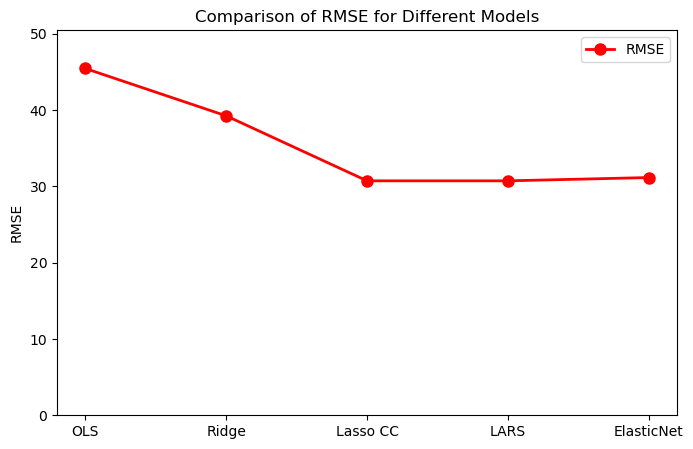

In [84]:
# RMSE values for the five models
models = ['OLS', 'Ridge', 'Lasso CC', 'LARS', 'ElasticNet']
rmse_values = [estimated_RMSE_ols, estimated_RMSE_ridge, estimated_RMSE_lasso, 
               estimated_RMSE_lasso_lars, estimated_RMSE_elasticnet]  # Replace with actual values

# Create the line plot
plt.figure(figsize=(8, 5))
plt.plot(models, rmse_values, marker='o', linestyle='-', color='red', linewidth=2, markersize=8, label='RMSE')

# Labels and title
plt.ylabel('RMSE')
plt.title('Comparison of RMSE for Different Models')
plt.ylim(0, max(rmse_values) + 5)  # Adjust y-axis range for better visualization

# Show plot
plt.legend()
plt.show()
